In [2]:
import sys
import os
sys.path.insert(0, "..")
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from lib_classification import *
pd.set_option('display.max_colwidth', 30)
pd.set_option('display.min_rows', 10)
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_colwidth', None) #afficher texte entier dans dataframe

(lib_classification.py : sys.path = ['..', '../..', '..', 'c:\\Users\\eupho\\OneDrive\\Documents\\perso\\projets\\classification_texte_articles\\sources\\classification\\tfidf', 'C:\\Users\\eupho\\OneDrive\\Documents\\perso\\formations\\nlu_stanford\\cs224u', 'c:\\Users\\eupho\\anaconda3\\python39.zip', 'c:\\Users\\eupho\\anaconda3\\DLLs', 'c:\\Users\\eupho\\anaconda3\\lib', 'c:\\Users\\eupho\\anaconda3', '', 'c:\\Users\\eupho\\anaconda3\\lib\\site-packages', 'c:\\Users\\eupho\\anaconda3\\lib\\site-packages\\locket-0.2.1-py3.9.egg', 'c:\\Users\\eupho\\anaconda3\\lib\\site-packages\\win32', 'c:\\Users\\eupho\\anaconda3\\lib\\site-packages\\win32\\lib', 'c:\\Users\\eupho\\anaconda3\\lib\\site-packages\\Pythonwin', 'c:\\Users\\eupho\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\eupho\\.ipython']


In [45]:
corpus = pd.read_csv(r"C:\Users\eupho\OneDrive\Documents\perso\projets\classification_texte_articles\data\input\merged_corpus\corpus_sceptic_theist.csv")
corpus = get_balanced_binary_dataset(corpus, class_col_name="category")

print(corpus["category_bin"].value_counts())
print("presence de doublons ?")
print(corpus.id.duplicated().any())
print(corpus.index.duplicated().any())
# corpus

inside function get_balanced_binary_dataset
0    2867
1    2867
Name: category_bin, dtype: int64
presence de doublons ?
False
False


In [5]:
X = corpus["message_preprocessed"]
y = corpus["category"]
# y = corpus["category_bin"]
indices = corpus["id"]
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, indices, test_size=0.33, random_state=42)
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
# indices_test

In [6]:
#Dimensions de la matrice
print("corpus.shape =", corpus.shape)
print("X_tfidf.shape =", X_train_tfidf.shape) # = (nb_documents, nb_mots)
print("X_tfidf.type =", type(X_train_tfidf)) # = (nb_documents, nb_mots)
print("X_tfidf :")
print(type(X_train_tfidf))
print(X_train_tfidf)

corpus.shape = (5734, 6)
X_tfidf.shape = (3841, 17512)
X_tfidf.type = <class 'scipy.sparse.csr.csr_matrix'>
X_tfidf :
<class 'scipy.sparse.csr.csr_matrix'>
  (0, 7976)	0.03261354839651453
  (0, 2201)	0.02294181059340388
  (0, 2575)	0.031236230412947468
  (0, 14088)	0.024602130127782052
  (0, 7812)	0.043052294613643176
  (0, 4033)	0.04539581617599564
  (0, 7240)	0.05817808395547675
  (0, 10686)	0.05453389508764257
  (0, 10605)	0.03755840456983043
  (0, 3969)	0.04396424759274322
  (0, 12979)	0.044296117638451434
  (0, 1958)	0.044296117638451434
  (0, 14994)	0.045803579697885885
  (0, 14897)	0.05817808395547675
  (0, 17170)	0.031981815590275305
  (0, 7312)	0.23118035434189185
  (0, 6808)	0.03222783719351089
  (0, 6823)	0.04250326074314633
  (0, 14825)	0.03157069413964378
  (0, 16494)	0.033835387060383325
  (0, 3847)	0.046696483481477355
  (0, 15260)	0.04771735337740864
  (0, 1067)	0.04958903891432667
  (0, 3248)	0.03704862207471818
  (0, 1077)	0.04958903891432667
  :	:
  (3840, 13140)	0.0

In [46]:
X_tfidf_xy

array([[ 3942,     0],
       [ 3763,     1],
       [ 5417,     1],
       ...,
       [   77, 21371],
       [ 5402, 21372],
       [ 5402, 21373]], dtype=int32)

In [26]:
X = corpus["message_preprocessed"]
y = corpus["category"]
indices = corpus["id"]
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [27]:
# X_tfidf_dict = X_tfidf.todok()
X_tfidf_dict = X_tfidf.todok()

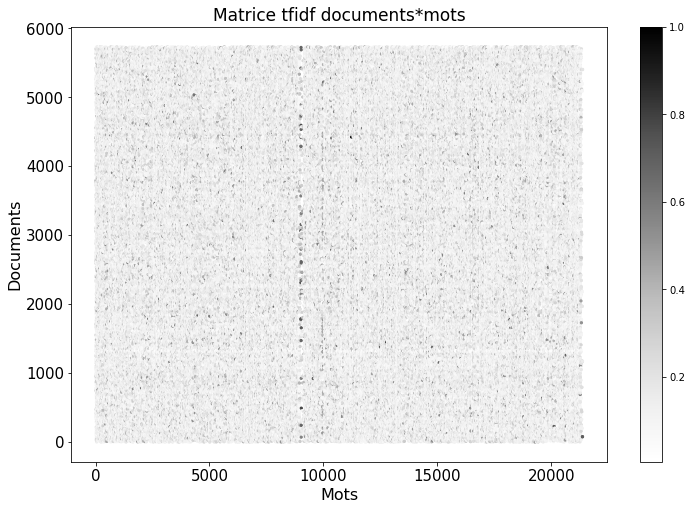

In [29]:
#Plot 1 de la matrice (avec un scatterplot de matplotlib)
plot_sparse_matrix(X_tfidf)

In [35]:
# Informations sur la matrice #
# Nombre de valeurs non nulles
print("nombre de valeurs non nulles (taille de la matrice csr) =", X_tfidf.count_nonzero())

# Intervalle des valeurs 
print("intervalle des valeurs [{} ; {}]".format(X_tfidf.min(), X_tfidf.max()))

# Valeurs uniques avec unique()
X_tfidf_unique = np.unique(X_tfidf.data)
print("valeurs uniques =", X_tfidf_unique)

# Nombre de valeurs uniques (auquel on additionne 1 pour les 0 qui ne sont pas stockees par definition)
print("nombre de valeurs uniques =", X_tfidf_unique.shape[0] + 1)

nombre de valeurs non nulles (taille de la matrice csr) = 220493
intervalle des valeurs [0.0 ; 1.0]
valeurs uniques = [0.00528296 0.00663004 0.00671075 ... 0.87509764 0.89519113 1.        ]
nombre de valeurs uniques = 191728


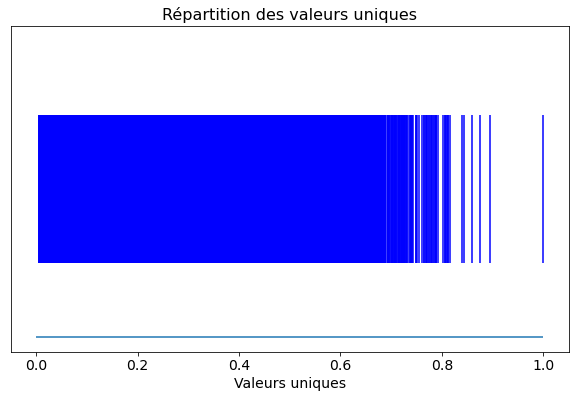

In [36]:
# Graphique avec barres en 1D des valeurs uniques (pour voir comment elles sont reparties, que a droite ?, que a gauche ?, etc.)
# sb.scatterplot(x=X_tfidf_unique, y=np.zeros_like(X_tfidf_unique), sizes=(10000,10000))
# path = PureWindowsPath(os.getcwd() + "\\data\\output\\tfidf_unique_distribution.png")
# path = path.as_posix()

plt.figure()
plt.hlines(0,0,1)  # Draw a horizontal line
plt.eventplot(X_tfidf_unique, orientation='horizontal', colors='b')
plt.xlabel("Valeurs uniques", size=14)
plt.title("Répartition des valeurs uniques", size=16)
plt.xticks(fontsize=14)
ax = plt.gca()
ax.get_yaxis().set_visible(False)
plt.rcParams["figure.figsize"] = (9, 4)
# plt.savefig(path)
plt.show()

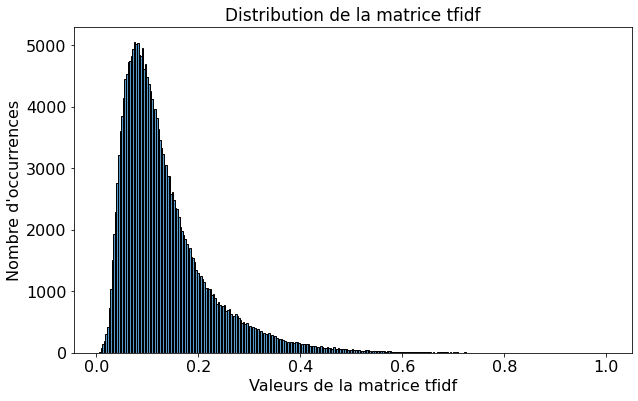

In [47]:
# Distribution des valeurs de la matrice tfidf
# values, counts = np.unique(X_tfidf.data, return_counts=True)
# value_counts = np.asarray((values, counts)).T

# path = PureWindowsPath(os.getcwd() + "\\data\\output\\tfidf_distribution.png")
# path = path.as_posix()

sb.histplot(X_tfidf.data, edgecolor="black", linewidth=1)
plt.xlabel("Valeurs de la matrice tfidf", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution de la matrice tfidf", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
# plt.xlim(0, 0.6)
# plt.savefig(path)
plt.show()

In [48]:
# Poids globaux (dans le corpus) des mots tfidf
print("X_tfidf.shape =", X_tfidf.shape)
n_words = X_tfidf.shape[1]
scores_tfidf = pd.DataFrame({"id":range(n_words), "words":tfidf_vectorizer.get_feature_names(), "idf":tfidf_vectorizer.idf_})
scores_tfidf = scores_tfidf.sort_values("idf", ascending=False)
print("moyenne des poids idf =", np.mean(scores_tfidf["idf"]))
print("ecart-type des poids idf =", np.std(scores_tfidf["idf"]))
with pd.option_context("display.max_rows", 100):
    display(scores_tfidf)
# scores_tfidf.to_csv("./data/output/scores_tfidf_train.csv")

X_tfidf.shape = (5734, 21374)
moyenne des poids idf = 8.218864117356032
ecart-type des poids idf = 1.0439947318115592


c:\Users\eupho\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,id,words,idf
0,0,aage,8.96
11569,11569,magnify,8.96
11575,11575,maimed,8.96
11576,11576,maiming,8.96
11577,11577,maimonedes,8.96
...,...,...,...
1137,1137,argument,2.88
19173,19173,think,2.87
21146,21146,would,2.53
8091,8091,god,2.47


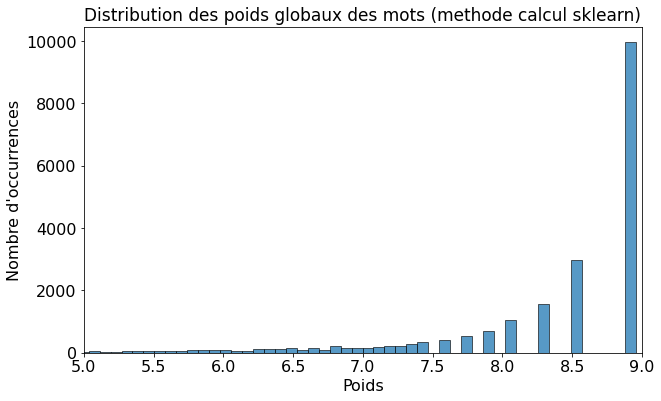

In [49]:
# Distribution des poids globaux des mots (calcules avec sklearn)
# path = PureWindowsPath(os.getcwd() + "\\data\\output\\words_weights_distribution.png")
# path = path.as_posix()

sb.histplot(data=scores_tfidf, x="idf")
# plt.yscale('log')
plt.xlabel("Poids", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution des poids globaux des mots (methode calcul sklearn)", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
plt.xlim(5, 9)
# plt.savefig(path)
plt.show()

In [50]:
# Calcul manuel des poids
print("X_tfidf.shape =", X_tfidf.shape)
words_weights = X_tfidf.sum(axis=0)
print("words_weights.shape =", words_weights.shape)
print(words_weights)
print(words_weights.shape)
words_weights = np.ravel(words_weights)
print(words_weights)
print(words_weights.shape)
# words_weights[:10]
np.set_printoptions(suppress=True)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
np.unique(words_weights).shape
np.max(words_weights)
np.min(words_weights)
print("words_weights.shape =", words_weights.shape)
words_weights

X_tfidf.shape = (5734, 21374)
words_weights.shape = (1, 21374)
[[0.0909079  0.35153918 1.43936425 ... 0.70710678 0.19869275 0.19869275]]
(1, 21374)
[0.0909079  0.35153918 1.43936425 ... 0.70710678 0.19869275 0.19869275]
(21374,)
words_weights.shape = (21374,)


array([0.091, 0.352, 1.439, ..., 0.707, 0.199, 0.199])

In [51]:
# scores_tfidf["manuel_weights"] = words_weights
print("corpus.shape =", corpus.shape)
print("scores_tfidf.shape =", scores_tfidf.shape)
scores_tfidf

corpus.shape = (5734, 6)
scores_tfidf.shape = (21374, 3)


,id,words,idf
0,0,aage,8.96
11569,11569,magnify,8.96
11575,11575,maimed,8.96
11576,11576,maiming,8.96
11577,11577,maimonedes,8.96
...,...,...,...
1137,1137,argument,2.88
19173,19173,think,2.87
21146,21146,would,2.53
8091,8091,god,2.47


In [62]:
scores_tfidf.sort_values("idf")

,id,words,idf
13285,13285,one,2.36
8091,8091,god,2.47
21146,21146,would,2.53
19173,19173,think,2.87
1137,1137,argument,2.88
...,...,...,...
16145,16145,remediation,8.96
16188,16188,reorder,8.96
16189,16189,reorienting,8.96
16124,16124,relinquish,8.96


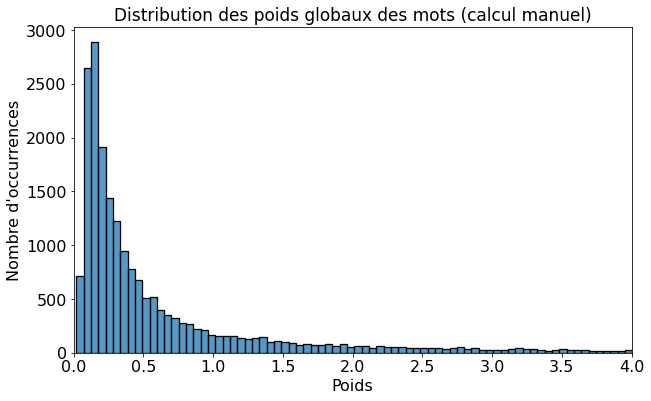

In [61]:
# Distribution des poids globaux des mots (calcules avec a la main)
# Pour chaque phrase, y a-t-il beaucoup de mots qui ont ete trouves et qui ont influences positivement la prediction ?
# path = PureWindowsPath(os.getcwd() + "\\data\\output\\words_weights_distribution_manuel.png")
# path = path.as_posix()

# sb.histplot(words_weights[:100000])
sb.histplot(words_weights, edgecolor="black", linewidth=1.3)
# plt.yscale('log')
plt.xlabel("Poids", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution des poids globaux des mots (calcul manuel)", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
plt.xlim(0, 4)
# plt.savefig(path)
plt.show()

In [56]:
# Calcul des poids locaux des mots (poids des mots pour chaque document)
# Technique : ne plus travailler sur la matrice creuse mais la convertir en numpy array X_tfidf.toarray()
# pour travailler dessus
threshold_score = 4.5
col_top_words = [] #liste des top words pour chaque exemple du corpus (partie train)

feature_names = tfidf_vectorizer.get_feature_names_out()
X_tfidf_arr = X_tfidf.toarray()
idx_vocab = np.argsort(X_tfidf_arr, axis=1)
vocab = tfidf_vectorizer.vocabulary_
vocab_inv = {v: k for k, v in vocab.items()}
idx_top_words = idx_vocab[:,-10:]
idx_top_words = np.flip(idx_top_words, axis=1)

col_top_words = []
for idx_row in range(len(idx_top_words)):
    row_matrix_top_words_idx = idx_top_words[idx_row]
    doc_top_words = []
    for idx_word in row_matrix_top_words_idx:
        word = vocab_inv[idx_word]
        score = str(round(X_tfidf_arr[idx_row, idx_word], 3))
        doc_top_words.append(word + " (" + score + ")")
    col_top_words.append(doc_top_words)


df_train = pd.DataFrame(X_tfidf_arr, columns = feature_names)
# df_train["id"] = list(indices_train)
df_train["top_words"] = col_top_words
# df_train.sort_values("id", inplace=True)
# df_train["message"] = corpus.iloc[indices_train].sort_values("id")["message"].values
df_train["message"] = corpus["message"].values

In [60]:
# df_train
display(df_train[["message", "top_words"]])

,message,top_words
0,"Feser continues with his objection: “The point for the moment is this. If nothing about the essence or nature of a thing entails that it _exists at all_ in the first place, then it is hard to see how anything about its essence or nature could entail that will _persist in existence_ once it does exist” (2021). But—by way of response—nothing in the exchange above assumes that it was something about the essence or nature of the contingent thing that explains why the object persists. Totally separate explanatory facts were cited. And so Feser’s point doesn’t support the denial of EIT.","[timeless (0.591), destructive (0.21), object (0.191), withdrawal (0.182), sustenance (0.143), cause (0.14), cease (0.138), exist (0.136), activity (0.134), mystery (0.133)]"
1,"Original sin is primarily an ontological reality (although it unfolds massive moral consequences): due to the fact that the relation between the created world and God is completely unilateral,14 no created quality, and no human act, since even our freest acts are created, can grant communion with God who ‘dwells in unapproachable light’ (cf. 1 Tim 6:16). Communion with God and participating in His eternal life is but possible in this way: God relates to the world with the same love in which He relates to His Son from all eternity. He does not become dependent on the world by His love for it and His love for the world is of divine nature, unchanging, unconditional and eternal. Being loved by God in this way is the deepest reality of the whole world and of every single human being; however, this deepest reality is supernatural and accessible only by faith in the word of God.","[forsake (0.371), sell (0.322), food (0.299), disciple (0.285), insuline (0.201), dime (0.201), condom (0.201), caanot (0.192), hath (0.18), naked (0.176)]"
2,Controversia 15: An actus sit causa partialis habitus an solum causetur ab ipsa potentia,"[goods (0.526), greter (0.263), quantitatively (0.263), enhance (0.251), promote (0.236), qualitatively (0.236), much (0.216), trivial (0.2), permitting (0.19), yield (0.188)]"
3,"Here’s a different objection to arguments from religious experience, offered by Graham Oppy (2013).","[preachy (0.292), disrespectful (0.292), delete (0.27), condescending (0.262), preaching (0.227), submit (0.227), confident (0.217), nonsense (0.203), happy (0.192), assuming (0.187)]"
4,"WCB @Talmid ""We can make sense of such a correlation only if we postulate a supreme being who brings the two orders into correlation (in the afterlife)"". See Plato, ""The Laws - Book X"". Here Plato tries to find arguments to convince atheists to believe in God. Plato's Good Workman argument. God is a good workman and so if good people suffer unfairly in this life, God will fix that in the afterlife. Plato pretty much invented natural theology aimed squarely at atheists. The trouble with his good workman hypothesis is it proves nothing. It is based solely on hope. Maybe there is no God, no afterlife. And a truly good workman does not allow errors now, that have to be rectified later. So the Problem Of Evil rears its ugly head. WCB","[totalizing (0.467), exempt (0.446), espouse (0.42), granted (0.332), metaphysics (0.264), logic (0.264), quite (0.239), take (0.195), people (0.181), reason (0.17)]"
...,...,...
5729,> “I don’t think that you could arrange mere non-conscious physical stuff in > such a way that [experience] would spring into existence. That would be what > we call ‘radical emergence’—it would be like getting concrete things out of > abstract things.” > > _Galen Strawson_,"[act (0.481), identical (0.411), ignore (0.27), bunch (0.223), saying (0.202), feser (0.197), theist (0.195), classical (0.195), god (0.187), right (0.178)]"
5730,"On page 4, Feser makes it clear that Thomistic classical theists like himself, Stump, and Miller do think that God has Cambridge properties. Here is the thing. I know that Feser, Stump, and Miller love to play the magical card called 